# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_data = pd.DataFrame({"City":cities}) 
cities_data = cities_data.drop_duplicates('City')
cities_data.head()

,City
0,wahran
1,taolanaro
2,atuona
3,upernavik
4,barsovo


In [3]:
cities_data["Lat"] = ""
cities_data["Lon"] = ""
cities_data["Date"] = ""
cities_data["Temp"] = ""
cities_data["Humidity"] = ""
cities_data["Cloudiness"] = ""
cities_data["Windspeed"] = ""

cities_data.head()

,City,Lat,Lon,Date,Temp,Humidity,Cloudiness,Windspeed
0,wahran,,,,,,,
1,taolanaro,,,,,,,
2,atuona,,,,,,,
3,upernavik,,,,,,,
4,barsovo,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
row_num = 0

# Loop through the cities and perform API Calls
for index, row in cities_data.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(base_url).json()
    print("Now retrieving city #%s: %s" % (row_num + 1, cities_data.loc[index]["City"]))
    print(base_url)
    row_num += 1
    
    try:    
        cities_data.set_value(index, "Lat", response["coord"]["lat"])
        cities_data.set_value(index, "Lon", response["coord"]["lon"])
        cities_data.set_value(index, "Date", response["dt"])
        cities_data.set_value(index, "Humidity", response["main"]["humidity"])
        cities_data.set_value(index, "Temp", response["main"]["temp"])
        cities_data.set_value(index, "Windspeed", response["wind"]["speed"])
        cities_data.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except:
        print("error skip.")

Now retrieving city #1: wahran
http://api.openweathermap.org/data/2.5/weather?q=wahran&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
error skip.
Now retrieving city #2: taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
error skip.
Now retrieving city #3: atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf


C:\Users\tharu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\tharu\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\tharu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\tharu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\tharu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a futur

Now retrieving city #4: upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #5: barsovo
http://api.openweathermap.org/data/2.5/weather?q=barsovo&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #6: moose factory
http://api.openweathermap.org/data/2.5/weather?q=moose factory&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #7: kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #8: yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #9: grand gaube
http://api.openweathermap.org/data/2.5/weather?q=grand gaube&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #10: bethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=IMPERIAL&appid=e6af8

Now retrieving city #60: clarence town
http://api.openweathermap.org/data/2.5/weather?q=clarence town&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #61: mareeba
http://api.openweathermap.org/data/2.5/weather?q=mareeba&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #62: techiman
http://api.openweathermap.org/data/2.5/weather?q=techiman&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #63: mandera
http://api.openweathermap.org/data/2.5/weather?q=mandera&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #64: saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #65: isangel
http://api.openweathermap.org/data/2.5/weather?q=isangel&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #66: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&units=IMPE

Now retrieving city #115: thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #116: tsihombe
http://api.openweathermap.org/data/2.5/weather?q=tsihombe&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
error skip.
Now retrieving city #117: aanekoski
http://api.openweathermap.org/data/2.5/weather?q=aanekoski&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #118: cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #119: teknaf
http://api.openweathermap.org/data/2.5/weather?q=teknaf&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #120: praia da vitoria
http://api.openweathermap.org/data/2.5/weather?q=praia da vitoria&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #121: butaritari
http://api.openweathermap.org/data/2.5/weat

Now retrieving city #170: lata
http://api.openweathermap.org/data/2.5/weather?q=lata&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #171: new amsterdam
http://api.openweathermap.org/data/2.5/weather?q=new amsterdam&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #172: tautira
http://api.openweathermap.org/data/2.5/weather?q=tautira&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #173: dali
http://api.openweathermap.org/data/2.5/weather?q=dali&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #174: hermon
http://api.openweathermap.org/data/2.5/weather?q=hermon&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #175: loreto
http://api.openweathermap.org/data/2.5/weather?q=loreto&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #176: saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha&units=IMPERIAL&appid=e6af85a83d931ec6f1f1

Now retrieving city #225: vytegra
http://api.openweathermap.org/data/2.5/weather?q=vytegra&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #226: college
http://api.openweathermap.org/data/2.5/weather?q=college&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #227: effingham
http://api.openweathermap.org/data/2.5/weather?q=effingham&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #228: kanniyakumari
http://api.openweathermap.org/data/2.5/weather?q=kanniyakumari&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #229: shestakovo
http://api.openweathermap.org/data/2.5/weather?q=shestakovo&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #230: seoul
http://api.openweathermap.org/data/2.5/weather?q=seoul&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #231: santa vitoria do palmar
http://api.openweathermap.org/data/2.5/weather?q=santa vitoria

Now retrieving city #280: manakara
http://api.openweathermap.org/data/2.5/weather?q=manakara&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #281: teahupoo
http://api.openweathermap.org/data/2.5/weather?q=teahupoo&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #282: aitape
http://api.openweathermap.org/data/2.5/weather?q=aitape&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #283: kamenka
http://api.openweathermap.org/data/2.5/weather?q=kamenka&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #284: aguimes
http://api.openweathermap.org/data/2.5/weather?q=aguimes&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #285: huaral
http://api.openweathermap.org/data/2.5/weather?q=huaral&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #286: khani
http://api.openweathermap.org/data/2.5/weather?q=khani&units=IMPERIAL&appid=e6af85a83d931ec6f1f1ee

Now retrieving city #336: utiroa
http://api.openweathermap.org/data/2.5/weather?q=utiroa&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
error skip.
Now retrieving city #337: natalio
http://api.openweathermap.org/data/2.5/weather?q=natalio&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #338: port blair
http://api.openweathermap.org/data/2.5/weather?q=port blair&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #339: mackay
http://api.openweathermap.org/data/2.5/weather?q=mackay&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #340: umm kaddadah
http://api.openweathermap.org/data/2.5/weather?q=umm kaddadah&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #341: urambo
http://api.openweathermap.org/data/2.5/weather?q=urambo&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #342: kununurra
http://api.openweathermap.org/data/2.5/weather?q=kununurra&units=IMPERIA

Now retrieving city #392: alta floresta
http://api.openweathermap.org/data/2.5/weather?q=alta floresta&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #393: tuatapere
http://api.openweathermap.org/data/2.5/weather?q=tuatapere&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #394: victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #395: slave lake
http://api.openweathermap.org/data/2.5/weather?q=slave lake&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #396: changji
http://api.openweathermap.org/data/2.5/weather?q=changji&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #397: okhotsk
http://api.openweathermap.org/data/2.5/weather?q=okhotsk&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #398: fairmount
http://api.openweathermap.org/data/2.5/weather?q=fairmount&units=IMPER

Now retrieving city #447: rungata
http://api.openweathermap.org/data/2.5/weather?q=rungata&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
error skip.
Now retrieving city #448: savannah bight
http://api.openweathermap.org/data/2.5/weather?q=savannah bight&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #449: alice springs
http://api.openweathermap.org/data/2.5/weather?q=alice springs&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #450: balykshi
http://api.openweathermap.org/data/2.5/weather?q=balykshi&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
error skip.
Now retrieving city #451: harlow
http://api.openweathermap.org/data/2.5/weather?q=harlow&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #452: rio tercero
http://api.openweathermap.org/data/2.5/weather?q=rio tercero&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #453: palmer
http://api.openweathermap.org/data/2.5/

Now retrieving city #502: ostrovnoy
http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #503: dibaya
http://api.openweathermap.org/data/2.5/weather?q=dibaya&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
error skip.
Now retrieving city #504: saint anthony
http://api.openweathermap.org/data/2.5/weather?q=saint anthony&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #505: nelson bay
http://api.openweathermap.org/data/2.5/weather?q=nelson bay&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #506: flin flon
http://api.openweathermap.org/data/2.5/weather?q=flin flon&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #507: kaitangata
http://api.openweathermap.org/data/2.5/weather?q=kaitangata&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #508: kavaratti
http://api.openweathermap.org/data/2.5/weather?q=kav

Now retrieving city #557: bikin
http://api.openweathermap.org/data/2.5/weather?q=bikin&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #558: carballo
http://api.openweathermap.org/data/2.5/weather?q=carballo&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #559: sisimiut
http://api.openweathermap.org/data/2.5/weather?q=sisimiut&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #560: ndioum
http://api.openweathermap.org/data/2.5/weather?q=ndioum&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #561: takhtamygda
http://api.openweathermap.org/data/2.5/weather?q=takhtamygda&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #562: namibe
http://api.openweathermap.org/data/2.5/weather?q=namibe&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #563: afsin
http://api.openweathermap.org/data/2.5/weather?q=afsin&units=IMPERIAL&appid=e6af85a83d931ec6f1

Now retrieving city #613: matelandia
http://api.openweathermap.org/data/2.5/weather?q=matelandia&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #614: eureka
http://api.openweathermap.org/data/2.5/weather?q=eureka&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #615: santiago
http://api.openweathermap.org/data/2.5/weather?q=santiago&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #616: lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?q=lazaro cardenas&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #617: udachnyy
http://api.openweathermap.org/data/2.5/weather?q=udachnyy&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #618: black river
http://api.openweathermap.org/data/2.5/weather?q=black river&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf
Now retrieving city #619: lasa
http://api.openweathermap.org/data/2.5/weather?q=lasa&units=IMPERIA

In [12]:
# "http://api.openweathermap.org/data/2.5/weather?q={}&units=IMPERIAL&appid={}".format(cities[0], api_key)

'http://api.openweathermap.org/data/2.5/weather?q=wahran&units=IMPERIAL&appid=e6af85a83d931ec6f1f1eec9ec5ec3cf'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_data["Date"] = pd.to_datetime(cities_data["Date"], unit='s')
cities_data = cities_data.dropna(axis=0, how='any')
cities_data.head()

,City,Lat,Lon,Date,Temp,Humidity,Cloudiness,Windspeed
2,atuona,-9.8,-139.03,2019-07-03 17:36:25,80.36,66,20,9.86
3,upernavik,72.79,-56.15,2019-07-03 17:36:26,41.3,82,50,3.4
4,barsovo,61.17,73.17,2019-07-03 17:36:26,75.2,69,20,8.95
5,moose factory,51.26,-80.61,2019-07-03 17:36:27,86,40,75,12.75
6,kapaa,22.08,-159.32,2019-07-03 17:36:30,74.73,88,75,4.7


In [7]:
cities_data.to_csv("cities_data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

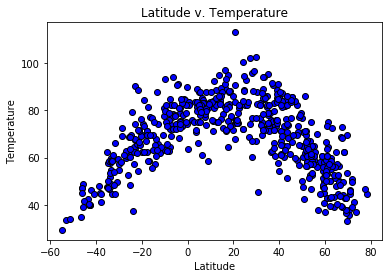

In [8]:
plt.scatter(x=cities_data["Lat"],y=cities_data["Temp"] , marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("LatitudeTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

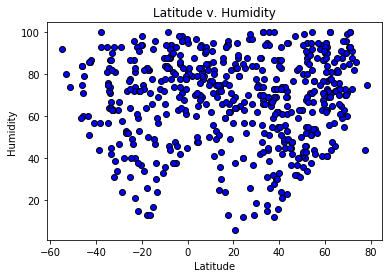

In [9]:
plt.scatter(x=cities_data['Lat'],y=cities_data['Humidity'] , marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Latitude v. Humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

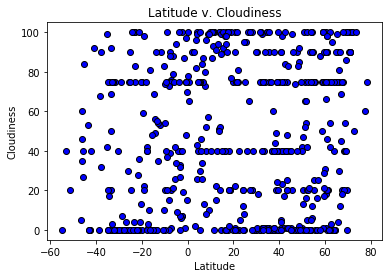

In [10]:
plt.scatter(x=cities_data["Lat"], y=cities_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Latitude v. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

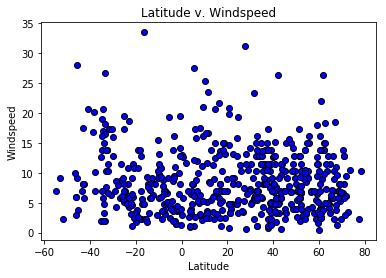

In [11]:
plt.scatter(x=cities_data["Lat"],y=cities_data["Windspeed"] , marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.savefig("Latitude v. Windspeed.png")
plt.show()